In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, PassiveAggressiveRegressor
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [2]:
def rmse_cv(model, X, y):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
def list_corr(data, var="SalePrice",  ascend=True):
    corr_m = data.corr().sort_values(var,ascending=ascend)
    return corr_m[var]

In [14]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20
train_file_path = '/home/matheus/PycharmProjects/HousePrices/data/train.csv'
test_file_path = '/home/matheus/PycharmProjects/HousePrices/data/test.csv'
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)
train['SalePrice'] = np.log1p(train['SalePrice'])
all_data = pd.concat([train.loc[:,:"SaleCondition"], test.loc[:,:"SaleCondition"]], sort = False)


change_to_none = ["Alley", "MasVnrType","MiscFeature"]
change_to_no = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
                "FireplaceQu", "GarageType","PoolQC","Fence"]
all_data.loc[:, "MasVnrArea"] = all_data.loc[:, "MasVnrArea"].fillna(0)
all_data.loc[:,change_to_none] = all_data.loc[:,change_to_none].fillna("None")
all_data.loc[:,change_to_no] = all_data.loc[:,change_to_no].fillna("No") 
all_data = all_data.fillna(all_data.mean())
all_data.columns[all_data.isna().any()].tolist()

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
#list_corr(all_data, 'MSSubClass')
#all_data['MSZoning']
train[all_data.columns] = all_data.iloc[:train.shape[0], :]
train.columns[train.isna().any()].tolist()
all_data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.000000,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,No,No,None,0,2,2008,WD,Normal
1,2,20,RL,80.000000,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,No,No,None,0,5,2007,WD,Normal
2,3,60,RL,68.000000,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,No,No,None,0,9,2008,WD,Normal
3,4,70,RL,60.000000,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,No,No,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.000000,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,No,No,None,0,12,2008,WD,Normal
5,6,50,RL,85.000000,14115,Pave,None,IR1,Lvl,AllPub,...,0,0,No,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.000000,10084,Pave,None,Reg,Lvl,AllPub,...,0,0,No,No,None,0,8,2007,WD,Normal
7,8,60,RL,69.305795,10382,Pave,None,IR1,Lvl,AllPub,...,0,0,No,No,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.000000,6120,Pave,None,Reg,Lvl,AllPub,...,0,0,No,No,None,0,4,2008,WD,Abnorml
9,10,190,RL,50.000000,7420,Pave,None,Reg,Lvl,AllPub,...,0,0,No,No,None,0,1,2008,WD,Normal


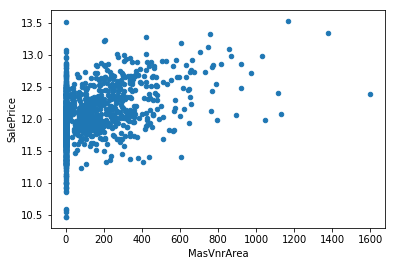

In [15]:
train.plot.scatter(x='MasVnrArea', y='SalePrice');
corr = list_corr(train, 'SalePrice')


In [16]:
#all_data['Garage'] = all_data['GarageCars']/2 +   all_data['GarageArea']
all_data['Lot'] = all_data['LotFrontage'] + all_data['LotArea']
'''
all_data["OverallQual"] = all_data.OverallQual.replace({1 : 1, 2 : 1,
                                                        3 : 2, 4 : 2, 5 : 2, 
                                                        6 : 3,
                                                        7 : 4, 8 : 4, 
                                                        9 : 5, 10 : 5 
                                                })
all_data["OverallCond"] = all_data.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 1,
                                                        5 : 2,
                                                        7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                })
'''
#all_data['YearDiff'] = all_data['YearRemodAdd'] - all_data['YearBuilt']

feat = corr[corr<0.3].keys()
#all_data[feat] = scaler.fit_transform(all_data[feat])
#all_data['FlrSF'] = (all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['LowQualFinSF'])/3
all_data[['YearBuilt','YearRemodAdd']] = np.sqrt(all_data[['YearBuilt','YearRemodAdd']])    
all_data['BsmtFinSF'] = all_data['BsmtFinSF1'] + all_data['BsmtFinSF2']
#all_data.drop(['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'],axis=1)
all_data['OverallQual_s3'] = all_data['OverallQual']**3
all_data['OverallQual_s2'] = all_data['OverallQual']**2
all_data['GrLivArea_s3'] = all_data['GrLivArea']**3
all_data['GrLivArea_s2'] = all_data['GrLivArea']**2
all_data['GarageCars_s2'] = all_data['GarageCars']**3
all_data['GarageCars_s3'] = all_data['GarageCars']**2
#all_data['GarageArea_s2'] = all_data['GarageArea']**3
#all_data['GarageArea_s3'] = all_data['GarageArea']**2
#all_data['Over_Gr'] = all_data['OverallQual']*all_data['GrLivArea']
all_data.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,Lot,BsmtFinSF,OverallQual_s3,OverallQual_s2,GrLivArea_s3,GrLivArea_s2,GarageCars_s2,GarageCars_s3
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,WD,Normal,8515.0,706.0,343,49,5000211000,2924100,8.0,4.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,WD,Normal,9680.0,978.0,216,36,2009916728,1592644,8.0,4.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,WD,Normal,11318.0,486.0,343,49,5696975656,3189796,8.0,4.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,WD,Abnorml,9610.0,216.0,343,49,5061868813,2948089,27.0,9.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,WD,Normal,14344.0,655.0,512,64,10618986392,4831204,27.0,9.0


In [17]:

train[all_data.columns] = all_data.iloc[:train.shape[0], :]

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data.loc[:,numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewed_feats = skewed_feats[abs(skewed_feats) > 0.5]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

positive =  numeric_feats
scaler = MinMaxScaler() 
all_data[numeric_feats] = scaler.fit_transform(all_data[numeric_feats])
X = all_data.iloc[:train.shape[0],:]
y = train.SalePrice
X_test = all_data[train.shape[0]:]
X = X[positive]
X_test = X_test[positive]


#X = scaler.fit_transform(X)
#X_test = scaler.transform(X_test)

/home/matheus/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:


model_lasso = LassoCV(alphas=[0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60],cv=10)
ridge = RidgeCV(alphas = [ 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv=10)
elastic = ElasticNetCV(alphas = [0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv=10)
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
print(rmse_cv(model_xgb,X,y).mean())
print(rmse_cv(model_lasso,X,y).mean())
print(rmse_cv(ridge,X,y).mean())
print(rmse_cv(elastic,X,y).mean())
model_lasso.fit(X, y)
ridge.fit(X,y)
model_xgb.fit(X, y)
elastic.fit(X,y)

0.13435117048584988
0.39922568603836983
0.1375243503261941
0.36610370805618436


ElasticNetCV(alphas=[0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], copy_X=True, cv=10,
       eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

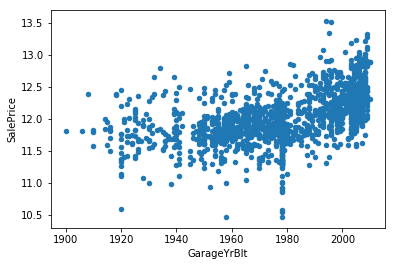

In [10]:
var = 'GarageYrBlt'
d =  pd.concat([train['SalePrice'], train[var]], axis=1)
d.plot.scatter(x=var, y='SalePrice');

In [5]:
list_corr(ascend=False)

SalePrice                1.000000
OverallQual              0.817185
GrLivArea                0.730254
GarageCars               0.680625
GarageArea               0.650888
1stFlrSF2                0.609903
1stFlrSF                 0.608955
FullBath                 0.594771
FullBath2                0.593797
YearBuilt2               0.588640
YearBuilt                0.586570
YearRemodAdd2            0.565619
YearRemodAdd             0.565608
TotRmsAbvGrd             0.539998
TotRmsAbvGrd 2           0.539329
Foundation_PConc         0.530840
ExterQual_Gd             0.509675
GarageYrBlt2             0.503448
GarageYrBlt              0.501656
Fireplaces               0.489450
HeatingQC_Ex             0.466706
BsmtQual_Ex              0.463991
OpenPorchSF              0.459948
BsmtFinType1_GLQ         0.440764
GarageFinish_Fin         0.418881
GarageType_Attchd        0.415787
KitchenQual_Ex           0.413937
MasVnrArea               0.413318
KitchenQual_Gd           0.406601
LotArea       

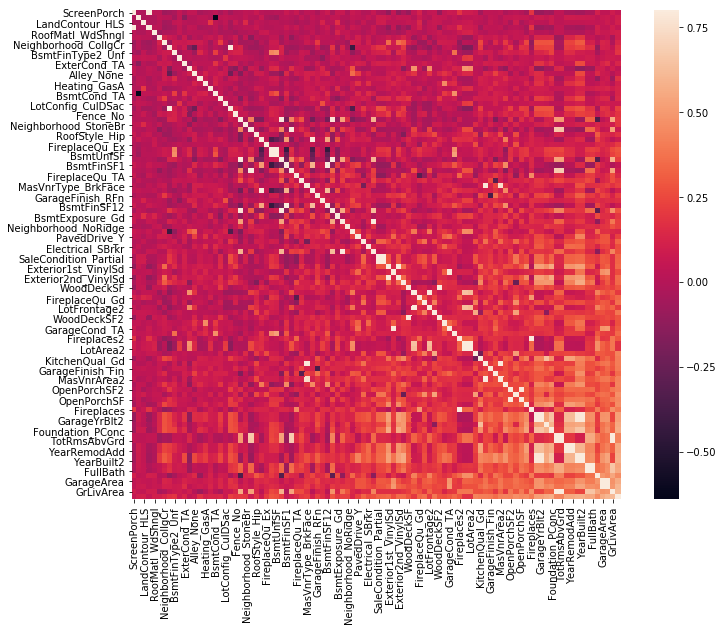

In [11]:
matriz_corr(positive)

In [7]:
#features_to_drop = ["GarageArea","1stFlrSF","TotRmsAbvGrd","GarageYrBlt", "GarageCond_TA","HouseStyle_2Story", "SalePrice"]
#features = pd.Index(["Id"]).append(positive.drop(features_to_drop))
features = pd.Index(["Id"]).append(positive)
print(features)
all_data = all_data.loc[:, features]

Index(['Id', 'BsmtFinSF1', 'BsmtUnfSF', 'BedroomAbvGr', 'FireplaceQu_Ex',
       'FireplaceQu_TA', 'GarageType_BuiltIn', 'MasVnrType_BrkFace',
       'BsmtFullBath', 'GarageFinish_RFn', 'LotShape_IR1', 'HouseStyle_2Story',
       'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MSZoning_RL',
       'PavedDrive_Y', 'Electrical_SBrkr', 'MasVnrType_Stone', 'HalfBath',
       'SaleCondition_Partial', 'SaleType_New', 'GarageQual_TA', 'BsmtQual_Gd',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'WoodDeckSF',
       'LotFrontage', 'FireplaceQu_Gd', 'CentralAir_Y', 'Neighborhood_NridgHt',
       'ExterQual_Ex', 'GarageCond_TA', 'TotalBsmtSF', 'LotArea',
       'KitchenQual_Gd', 'MasVnrArea', 'KitchenQual_Ex', 'GarageType_Attchd',
       'GarageFinish_Fin', 'BsmtFinType1_GLQ', 'OpenPorchSF', 'BsmtQual_Ex',
       'HeatingQC_Ex', 'Fireplaces', 'GarageYrBlt', 'GarageYrBlt2',
       'ExterQual_Gd', 'Foundation_PConc', 'TotRmsAbvGrd 2', 'TotRmsAbvGrd',
       'YearRemodAdd', 'YearRemodAdd2', 'Yea

/home/matheus/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


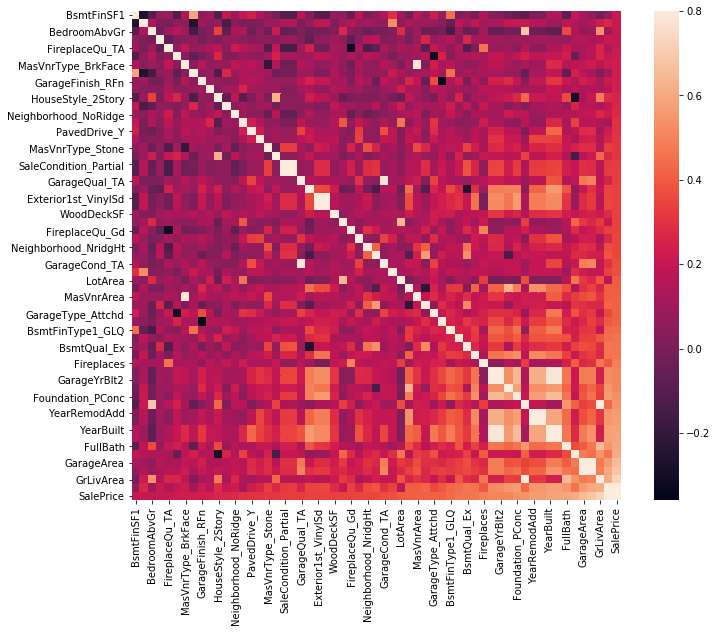

In [7]:
matriz_corr(features[1:])

/home/matheus/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


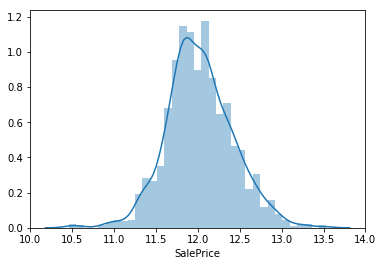

In [8]:

sns.distplot(train['SalePrice']) 

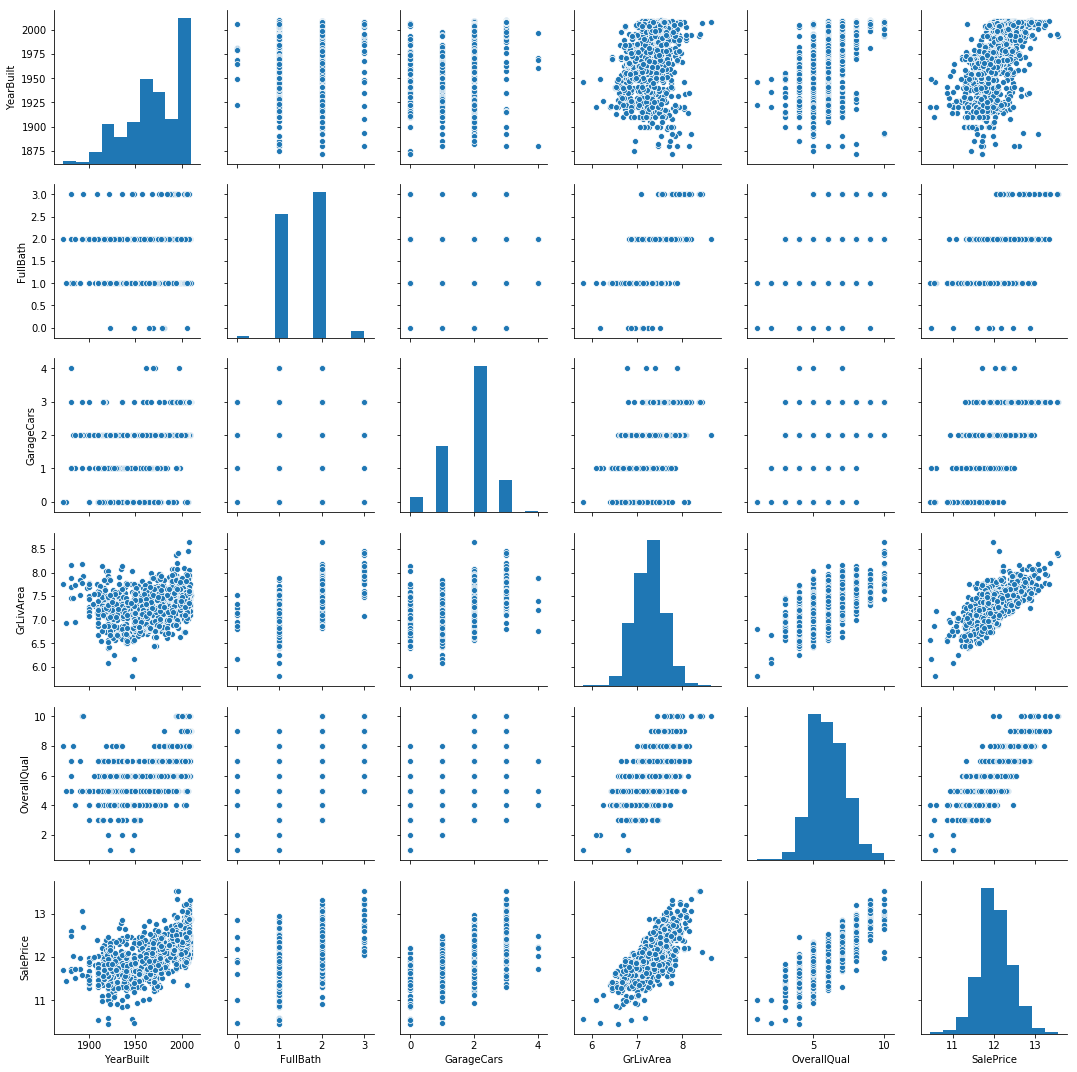

In [9]:
cols = ['YearBuilt', 'FullBath', 'GarageCars',
       'GrLivArea', 'OverallQual','SalePrice']
sns.pairplot(train[cols], height = 2.5)

Text(0, 0.5, 'rmse')

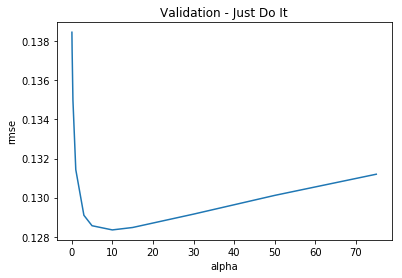

In [18]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha),X,y).mean() 
            for alpha in alphas]
y.shape
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [19]:
#test.loc[0,"Neighborhood_NridgHt":"OverallQual"].values
cv_ridge.idxmin()
rmse_cv(LassoCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]),X,y).mean()

/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/matheus/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of 

0.14792178061026015

In [20]:
def residual_plot(y_train_pred,y):
    y_rsd = y_train_pred - y
    plt.scatter(y_train_pred, y_rsd, c = "blue", label = "Training data")
    plt.xlabel("Predict Values")
    plt.ylabel("Residuals")
    plt.hlines(y = 0, xmin = min(y_train_pred), xmax =  max(y_train_pred), color = "red")# plotar a reta

In [5]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]).fit(X,y)
alpha = ridge.alpha_
print("Best alpha :", alpha)
residual_plot(ridge.predict(X), y)

Best alpha : 6.0


NameError: name 'residual_plot' is not defined

Text(0, 0.5, 'Residuals')

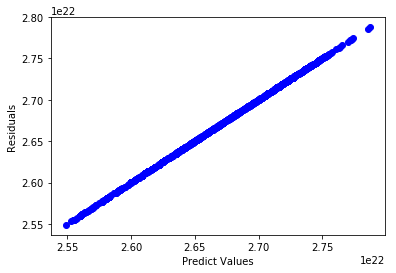

In [22]:
sgd = SGDRegressor(max_iter=1000, tol=0.0001).fit(X,y)
y_pred = sgd.predict(X)
r = y_pred - y
plt.scatter(y_pred, r, c = 'blue', label = "Training data")
plt.xlabel("Predict Values")
plt.ylabel("Residuals")

In [23]:
ridge_preds = ridge.predict(X_test)

In [24]:
model_lasso = LassoCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60],cv=5)
rmse_cv(model_lasso,X,y).mean()
#model_lasso.fit(X,y)

0.14792178061026015

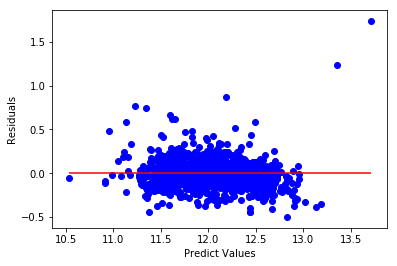

In [25]:

lasso_preds = np.expm1(model_lasso.predict(X_test))
residual_plot( model_lasso.predict(X), y)

In [13]:
rmse_cv(RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]),X,y).mean()

0.13065755065888326

In [29]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf',gamma='scale', C=200, epsilon=0.03)
#svr_model.fit(X,y)
#sp = svr_model.predict(X_test)
#print(mean_squared_error(sp, np.log1p(y_

In [13]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, input_shape=[len(X.keys())]),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_model()
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
test_predictions = 

In [98]:
#ann = model.predict(X)
xgb_p = model_xgb.predict(X)
rp = ridge.predict(X)
lp = model_lasso.predict(X)
el = elastic.predict(X)
#sp = svr_model.predict(X)
#ann = np.reshape(ann,1460)
train_preds = 0.3*xgb_p + 0.5*rp + 0.15*el + 0.05*lp
#print(mean_squared_error(ann ,y))
print(mean_squared_error(xgb_p ,y))
print(mean_squared_error(rp ,y))
print(mean_squared_error(lp, y))
print(mean_squared_error(el, y))
print(mean_squared_error(train_preds, y))
#print(mean_squared_error(sp, y))
#residual_plot(train_preds, y)
#preds = np.expm1(y)
#pd.DataFrame({'Id':X.Id,'SalePrice':preds})

#ann.shape

0.006226530040751393
0.010368880036489884
0.03558788288627103
0.028645765762095914
0.009490866817049177


In [12]:
#ann = model.predict(X_test)
xgb_p = model_xgb.predict(X_test)
rp = ridge.predict(X_test)
lp = model_lasso.predict(X_test)
el = elastic.predict(X_test)
#ann = np.reshape(ann,ann.shape[0])
preds = 1*xgb_p + 0.0*rp + 0.0*el + 0.0*lp
preds = np.expm1(preds)
submission = pd.DataFrame({'Id':test.Id,'SalePrice':preds})

In [13]:
submission.to_csv('submission.csv',index=False)
pd.read_csv('submission.csv')

,Id,SalePrice
0,1461,120063.980994
1,1462,162627.805574
2,1463,183257.903422
3,1464,191396.638775
4,1465,190789.410730
5,1466,170924.749475
6,1467,165232.480209
7,1468,162002.118636
8,1469,187311.824155
9,1470,122733.782550
